In [50]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

rng = np.random.default_rng(14105071)

Events :
- Birth
- Death (X, Y, Z)
- Transmission
- Recovery 

In [51]:
class Gillespie_Model:
    def __init__(self, beta, gamma, mu, nu, X_0, Y_0, Z_0) -> None:
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.nu = nu
        self.X = X_0
        self.Y = Y_0
        self.Z = Z_0
        self.X_hist = [X_0]
        self.Y_hist = [Y_0]
        self.Z_hist = [Z_0]
        self.t = [0]
        
    
    def infection_event(self):
        self.X -= 1
        self.Y += 1

    def recovery_event(self):
        self.Y -= 1
        self.Z += 1

    def birth_event(self):
        self.X +- 1

    def death_event_S(self):
        self.X -= 1

    def death_event_I(self):
        self.Y -= 1

    def death_event_R(self):
        self.Z -= 1

    def birth_rate(self):
        return self.nu * (self.X + self.Y + self.Z)

    def transmission_rate(self): 
        return self.beta * self.X * self.Y / (self.X + self.Y + self.Z)

    def recovery_rate(self):
        return self.gamma * self.Y

    def death_rate_S(self):
        return self.mu * self.X

    def death_rate_I(self):
        return self.mu * self.Y

    def death_rate_R(self):
        return self.mu * self.Z

    def gillespie_direct_step(self):
        R_1 = self.birth_rate()
        R_2 = self.transmission_rate()
        R_3 = self.recovery_rate()
        R_4 = self.death_rate_S()
        R_5 = self.death_rate_I()
        R_6 = self.death_rate_R()
        R_m = [R_1, R_2, R_3, R_4, R_5, R_6]
        events = [self.birth_event,
                  self.infection_event,
                  self.recovery_event,
                  self.death_event_S,
                  self.death_event_I,
                  self.death_event_R]
        event_rate = sum(R_m)
        time_until_next_event = -1 / event_rate * np.log(rng.random())
        P = rng.random() * event_rate
        for i in range(len(R_m)):
            if i == 0:
                lower_bound = 0
            else:
                lower_bound = sum(R_m[:i])
            upper_bound = sum(R_m[:i+1])
            if (P <= upper_bound) and (P > lower_bound): 
                events[i]()
        self.t.append(self.t[-1] + time_until_next_event)
        self.X_hist.append(self.X)
        self.Y_hist.append(self.Y)
        self.Z_hist.append(self.Z)

    def simulate_n_units(self, n):
        while self.t[-1] < n:
            self.gillespie_direct_step()

In [78]:
_ = Gillespie_Model(520, 365.25/7, 1/70, 1/70, 2000, 5, 19795)
_.simulate_n_units(100)

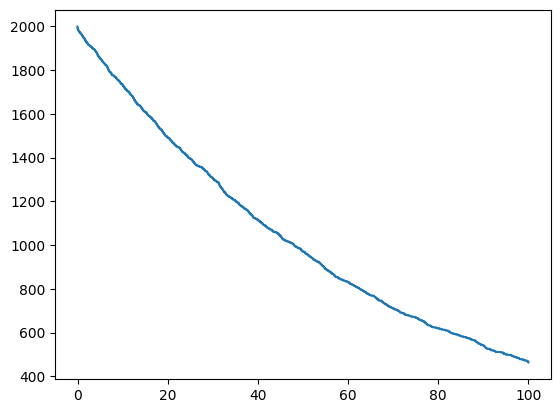

In [79]:
plt.plot(_.t, _.X_hist)
# plt.plot(_.t, _.Y_hist)
# plt.plot(_.t, _.Z_hist)